AAI551 Project - CNN classifier model


Sashank Vasireddy & Yunwei Zheng

import library

In [60]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt
import numpy as np

load data

In [61]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [62]:
X_test.shape

(10000, 32, 32, 3)

In [63]:
y_train.shape

(50000, 1)

In [64]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [65]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [66]:
y_test = y_test.reshape(-1,)

add tag

In [69]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [70]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

sample

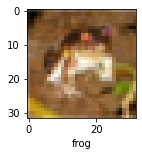

In [75]:
plot_sample(X_train, y_train, 0)

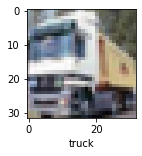

In [76]:
plot_sample(X_train, y_train, 1)

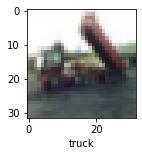

In [77]:
plot_sample(X_train, y_train, 2)

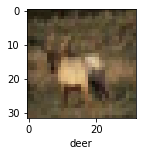

In [78]:
plot_sample(X_train, y_train, 3)

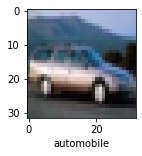

In [79]:
plot_sample(X_train, y_train, 4)

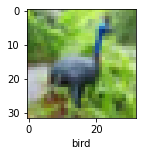

In [80]:
plot_sample(X_train, y_train, 6)

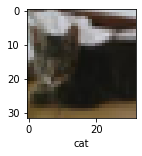

In [81]:
plot_sample(X_train, y_train, 9)

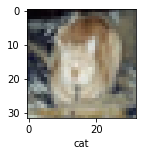

In [82]:
plot_sample(X_train, y_train, 33)

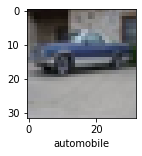

In [83]:
plot_sample(X_train, y_train, 10000)

base model

In [84]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [85]:
cnn1 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.8162 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.6245 - accuracy: 0.4286
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.5431 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4826 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4344 - accuracy: 0.4937


In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
y_pred = cnn1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.56      0.55      1000
           1       0.40      0.82      0.53      1000
           2       0.37      0.38      0.37      1000
           3       0.38      0.32      0.34      1000
           4       0.50      0.29      0.37      1000
           5       0.53      0.25      0.34      1000
           6       0.47      0.64      0.54      1000
           7       0.63      0.48      0.55      1000
           8       0.55      0.67      0.61      1000
           9       0.56      0.39      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



cnn model2

In [88]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [89]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train model

In [90]:
cnn2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4916 - accuracy: 0.4631
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1099 - accuracy: 0.6129
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9727 - accuracy: 0.6611
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8886 - accuracy: 0.6911
Epoch 5/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.8267 - accuracy: 0.7125
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7699 - accuracy: 0.7332
Epoch 7/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7237 - accuracy: 0.7480
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6848 - accuracy: 0.7613
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6479 - accuracy: 0.7712
Epoch 10/10
1563/1563 [==============================] - 43s 28m

test

In [112]:
cnn2.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9202 - accuracy: 0.7038


[0.9201566576957703, 0.7038000226020813]

test sample

In [100]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

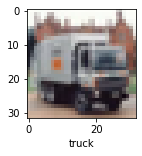

In [110]:
plot_sample(X_test, y_test,11)

In [114]:
classes[y_classes[11]]

'truck'

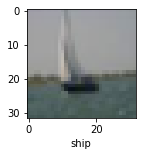

In [103]:
plot_sample(X_test, y_test,55)

In [104]:
classes[y_classes[55]]

'ship'

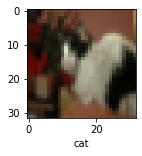

In [105]:
plot_sample(X_test, y_test,78)

In [106]:
classes[y_classes[78]]

'cat'

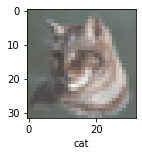

In [109]:
plot_sample(X_test, y_test,432)

In [108]:
classes[y_classes[432]]

'cat'